### Exploratory Data Analysis

- Get some statistics (mean, max, min, std, etc)
- Pixel values distribution (high, medium, low), for each channe (R,G,B)
- Size of the images (100x100) or (300x300) --> Upsampling, downsampling
- Image selection based on face identification.
- Explore a bit deeper on dblip library and method for face identification

In [1]:
import pandas as pd
from matplotlib import image

In [3]:
dataset2=pd.read_csv('../data/train.csv')
dataset2.head()

,nameid,name,book_date,city,holding_location,age,height,weight,race,sex,eyes,hair,bookid,feet,inches,bmi,gender,index
0,699804,MALIK TYRONE MANDUJANO,4/1/2018 3:24:44 AM,"DES MOINES, IA",PCJ,21,1.6002,58.96696,Black,Male,Brown,Black,270020,5.0,3.0,23.028211,1,270020.jpg
1,238047,DUSTIN GLEN BLACK,8/5/2018 9:26:54 PM,"DES MOINES, IA",PCJ,29,1.8796,104.32616,White,Male,Blue,Blonde,277774,6.0,2.0,29.529925,1,277774.jpg
2,680272,JAYDEN SIDNEY STRAIGHT,8/31/2018 12:12:14 AM,"DES MOINES, IA",PCJ,18,1.7272,56.69900,White,Male,Brown,Black,279426,5.0,8.0,19.005974,1,279426.jpg
3,995244,MASON DAVIS VANG,9/6/2018 4:00:23 PM,"ANKENY, IA",PCJ,23,1.7272,86.18248,Asian,Male,Brown,Black,279799,5.0,8.0,28.889081,1,279799.jpg
4,972517,DAMIR JIRE YOUNG,9/30/2018 7:31:03 PM,"ANKENY, IA",PCJ,19,1.8542,72.57472,Black,Male,Brown,Black,281182,6.0,1.0,21.109221,1,281182.jpg


In [4]:
all_paths=dataset2['index'].tolist()
all_bmi=dataset2['bmi']

In [6]:
all_face_raw=[]
all_bmi=[]

for ii,path in enumerate(all_paths[:]):
    image_path='../data/face/'+str(path)
    data = image.imread(image_path)
    all_face_raw.append(data)
    all_bmi.append(dataset2['bmi'].loc[ii])
    

In [7]:
all_info=[]
for ii,image in enumerate(all_face_raw[:]):
    output_dict={}
    output_dict['image']=ii
    output_dict['nameid']=dataset2['nameid'].loc[ii]
    output_dict['name']=dataset2['name'].loc[ii]
    output_dict['path']=all_paths[ii]
    
    output_dict['mean']=image.mean()
    output_dict['max']=image.max()
    output_dict['min']=image.min()
    output_dict['std']=image.std()
    output_dict['mean_R']=image[:,:,0].mean()
    output_dict['mean_G']=image[:,:,1].mean()
    output_dict['mean_B']=image[:,:,2].mean()
    output_dict['std_R']=image[:,:,0].std()
    output_dict['std_G']=image[:,:,1].std()
    output_dict['std_B']=image[:,:,2].std()
    all_info.append(output_dict)

In [8]:
# import numpy as np
# all_face_raw_np=np.array(all_face_raw)
# import matplotlib.pyplot as plt
# plt.hist(image.reshape(-1),bins=20)

In [9]:
output_df=pd.DataFrame(all_info)
output_df

,image,nameid,name,path,mean,max,min,std,mean_R,mean_G,mean_B,std_R,std_G,std_B
0,0,699804,MALIK TYRONE MANDUJANO,270020.jpg,154.355456,-7,4,51.336341,166.707506,160.135761,136.223102,49.576296,50.254246,49.073354
1,1,238047,DUSTIN GLEN BLACK,277774.jpg,113.459946,-13,5,34.170016,122.425909,120.178490,97.775440,39.196696,29.522518,26.893844
2,2,680272,JAYDEN SIDNEY STRAIGHT,279426.jpg,123.567271,-3,6,45.734607,126.516024,131.179980,113.005810,46.878477,45.414446,42.856813
3,3,995244,MASON DAVIS VANG,279799.jpg,122.476046,-9,0,41.285252,131.801528,132.750394,102.876215,39.810389,42.544848,33.790600
4,4,972517,DAMIR JIRE YOUNG,281182.jpg,117.853794,-7,6,49.268493,136.889117,118.064771,98.607494,51.674477,44.906898,43.156273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1256,556628,NICOLE LOUISE HARMON,304899.jpg,126.477295,-10,0,48.736135,143.807150,125.135949,110.488785,51.987767,45.193287,42.693279
1257,1257,64296,AMANDA SUE CRABB,304901.jpg,94.647281,-11,5,41.997462,101.832115,94.494797,87.614931,42.597259,40.775052,41.389976
1258,1258,470798,THOMAS COLIN LUECK,304910.jpg,142.286080,-7,8,42.051316,157.892257,142.349181,126.616803,43.924690,38.792979,37.169650
1259,1259,1056459,MARCIA LYNN SECREST,304913.jpg,121.051231,-12,9,44.744025,134.389447,121.479528,107.284716,47.309156,41.533449,40.930322


<AxesSubplot:ylabel='Frequency'>

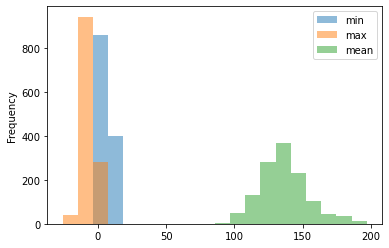

In [10]:
output_df[['min','max','mean']].plot.hist(bins=20,alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

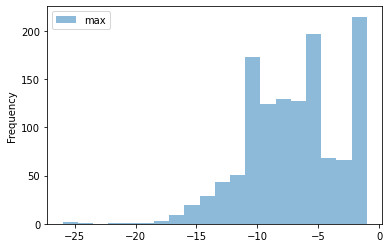

In [11]:
output_df[['max']].plot.hist(bins=20,alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

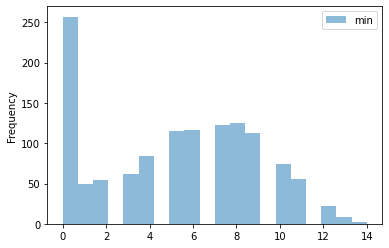

In [12]:
output_df[['min']].plot.hist(bins=20,alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

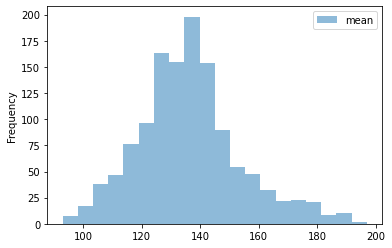

In [13]:
output_df[['mean']].plot.hist(bins=20,alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

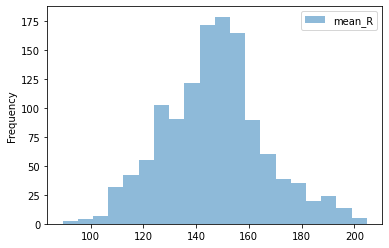

In [14]:
output_df[['mean_R']].plot.hist(bins=20,alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

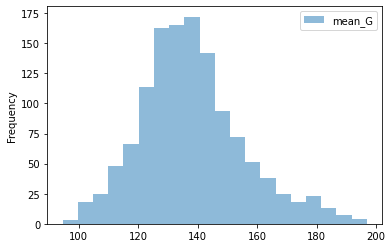

In [15]:
output_df[['mean_G']].plot.hist(bins=20,alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

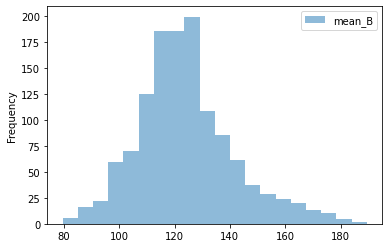

In [16]:
output_df[['mean_B']].plot.hist(bins=20,alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

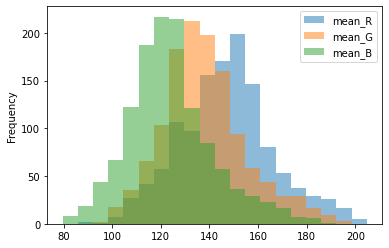

In [17]:
output_df[['mean_R','mean_G','mean_B']].plot.hist(bins=20,alpha=0.5)

In [18]:
dataset2.head()

,nameid,name,book_date,city,holding_location,age,height,weight,race,sex,eyes,hair,bookid,feet,inches,bmi,gender,index
0,699804,MALIK TYRONE MANDUJANO,4/1/2018 3:24:44 AM,"DES MOINES, IA",PCJ,21,1.6002,58.96696,Black,Male,Brown,Black,270020,5.0,3.0,23.028211,1,270020.jpg
1,238047,DUSTIN GLEN BLACK,8/5/2018 9:26:54 PM,"DES MOINES, IA",PCJ,29,1.8796,104.32616,White,Male,Blue,Blonde,277774,6.0,2.0,29.529925,1,277774.jpg
2,680272,JAYDEN SIDNEY STRAIGHT,8/31/2018 12:12:14 AM,"DES MOINES, IA",PCJ,18,1.7272,56.69900,White,Male,Brown,Black,279426,5.0,8.0,19.005974,1,279426.jpg
3,995244,MASON DAVIS VANG,9/6/2018 4:00:23 PM,"ANKENY, IA",PCJ,23,1.7272,86.18248,Asian,Male,Brown,Black,279799,5.0,8.0,28.889081,1,279799.jpg
4,972517,DAMIR JIRE YOUNG,9/30/2018 7:31:03 PM,"ANKENY, IA",PCJ,19,1.8542,72.57472,Black,Male,Brown,Black,281182,6.0,1.0,21.109221,1,281182.jpg


In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

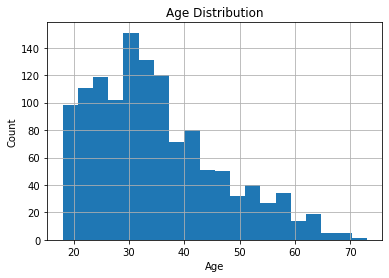

In [20]:
dataset2.age.hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

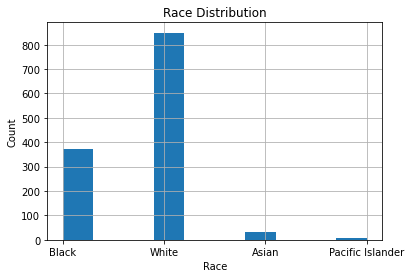

In [21]:
dataset2.race.hist()
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

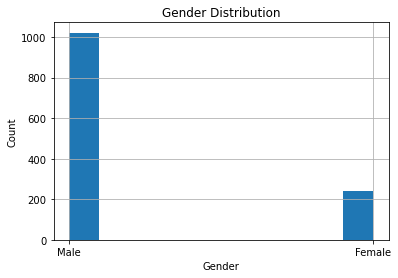

In [22]:
dataset2.sex.hist()
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

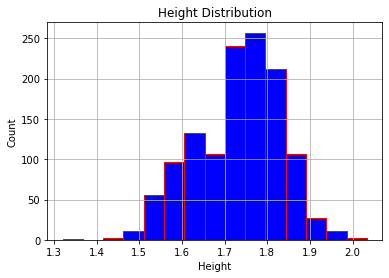

In [31]:
dataset2.height.hist(bins=15, align='left', color='b', edgecolor='red',
              linewidth=1)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')



Text(0, 0.5, 'Count')

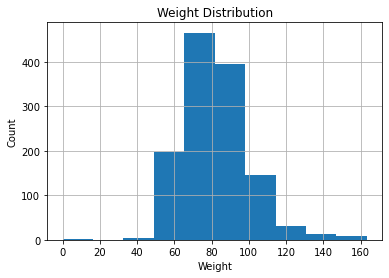

In [24]:
dataset2.weight.hist()
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Count')